In [1]:
import numpy as np

In [38]:
#eigenVectors are like a summary of the original Vector
# and eigenValues are the magnitude(importance) of that 'summary'
def PCA(X, dimensions):
    XMean = X - np.mean(X, axis=0)
    covMatrix = np.cov(XMean, rowvar=False)
    eigenValues, eigenVectors = np.linalg.eigh(covMatrix)
    
#     Getting the Vector with reduced dimensions (Sorting them with their importance)
    decsortIndex = np.argsort(eigenValues)
    decreasingEigenVal = eigenValues[decsortIndex]
    decreasingEigenVec = eigenVectors[:,decsortIndex]
    
#     [Covariance matrix].[Eigenvector] = [Eigenvalue].[Eigenvector]
    eigenvecNewDim = decreasingEigenVec[:, 0:dimensions]
    XNew = np.dot(eigenvecNewDim.T, XMean.T).T
    return XNew
    

In [42]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
x = data.iloc[:,0:4]
target = data.iloc[:,4]
matReduced = PCA(x , 2)
irisData = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
irisData = pd.concat([irisData , pd.DataFrame(target)] , axis = 1)



<AxesSubplot:xlabel='PC1', ylabel='PC2'>

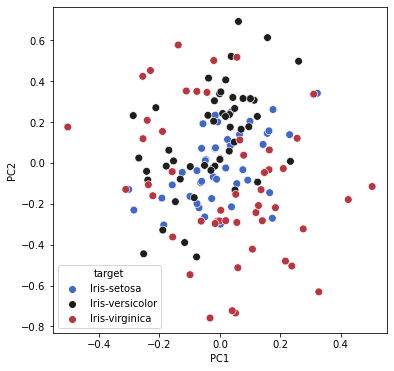

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
 
plt.figure(figsize = (6,6))
sns.scatterplot(data = irisData , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')
